In [5]:
import numpy as np
from skmultiflow.data import FileStream
from skmultiflow.neural_networks import PerceptronMask
from fires import FIRES
from sklearn.metrics import accuracy_score

In [85]:
# Load data as scikit-multiflow FileStream
#
stream = FileStream('../datasets/binary/mnist_train_binary.csv', target_idx=0)
stream.prepare_for_use()

In [42]:
x, y = stream.next_sample(batch_size=5)

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
y

array([0, 0, 0, 0, 0])

In [19]:
# for mnist
y = (y == 3).astype(int)

In [47]:
stream.target_values


[0, 1]

In [86]:
# Initial fit of the predictive model
predictor = PerceptronMask()
x,y = stream.next_sample(batch_size=100)
predictor.partial_fit(x,y, stream.target_values)

PerceptronMask(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
               fit_intercept=True, max_iter=1000, n_iter_no_change=5,
               n_jobs=None, penalty=None, random_state=0, shuffle=True,
               tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
# paint mnist
import matplotlib.pyplot as plt

def paint_digit(digit_values):
    plt.figure()
    plt.imshow(digit_values.reshape(28,28))
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    
    plt.show

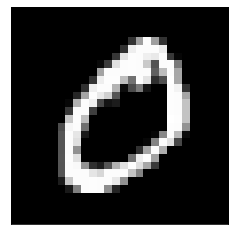

In [62]:
paint_digit(x[0])

In [88]:
fires_model = FIRES(n_total_ftr=stream.n_features,
                    target_values=stream.target_values,
                    mu_init=0,
                    sigma_init=1,
                    model='probit')

In [89]:
n_selected_ftr = 100

while stream.has_more_samples():
    # Load a new sample
    x, y = stream.next_sample(batch_size=10)

    # Select features
    ftr_weights = fires_model.weigh_features(x, y)  # Get feature weights with FIRES
    ftr_selection = np.argsort(ftr_weights)[::-1][:n_selected_ftr]

    # Truncate x (retain only selected features, 'remove' all others, e.g. by replacing them with 0)
    x_reduced = np.zeros(x.shape)
    x_reduced[:, ftr_selection] = x[:, ftr_selection]

    # Test
    y_pred = predictor.predict(x)
    print(accuracy_score(y, y_pred))

    # Train
    predictor.partial_fit(x, y)

# Restart the FileStream
stream.restart()

1.0
1.0
1.0
1.0
0.9
0.8
0.8
1.0
1.0
0.9
0.8
0.9
1.0
1.0
1.0
0.9
1.0
1.0
0.9
1.0
1.0
0.9
0.9
1.0
1.0
0.9
1.0
0.9
0.9
1.0
1.0
0.9
1.0
1.0
1.0
1.0
0.8
1.0
0.9
0.9
1.0
1.0
1.0
0.9
0.9
1.0
0.9
0.9
1.0
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
0.9
0.9
1.0
0.9
0.9
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.9
1.0
0.8
0.7
1.0
1.0
1.0
1.0
1.0
0.9
1.0
0.9
1.0
0.8
1.0
1.0
1.0
1.0
0.9
1.0
0.9
1.0
0.9
1.0
1.0
1.0
0.8
0.9
0.9
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.7
0.9
1.0
1.0
0.9
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
1.0
0.9
1.0
0.9
1.0
1.0
1.0
1.0
0.9
1.0
0.9
0.9
0.9
1.0
0.9
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.9
1.0
0.9
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.9
0.9
0.8
1.0
1.0
0.9
1.0
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9
0.9
0.9
0.9
0.9
0.8
1.0
1.0
0.9
1.0
1.0
0.9
0.9
1.0
0.8
0.7
0.9
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9
0.9
0.9
0.9
0.9
0.9
0.9
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
0.9
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.9
0.8
0.9
1.0


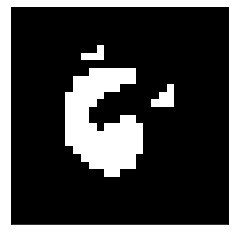

In [90]:
paint_digits = np.zeros(784)
paint_digits[ftr_selection] = 1


paint_digit(paint_digits)

In [82]:
predictor.predict(x_reduced)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
predictor.partial_fit(x_reduced, y)

PerceptronMask(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
               fit_intercept=True, max_iter=1000, n_iter_no_change=5,
               n_jobs=None, penalty=None, random_state=0, shuffle=True,
               tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
fires_model.mu

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.81865592e-05, -6.45594338e-05, -2.75277042e-05, -1.14698768e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.38160603e-07, -2.09071430e-06, -6.17341686e-05, -1.51842386e-04,
       -2.48667512e-04, -3.08561625e-04, -4.76598818e-04, -6.63773879e-04,
       -6.90515563e-04, -7.96226467e-04, -9.25612567e-04, -9.02726813e-04,
       -9.09888158e-04, -6.13456793e-04, -3.94760974e-04, -3.34981603e-04,
       -2.90479513e-04, -1.29720619e-04, -6.66334134e-05, -2.39957176e-05,
        0.00000000e+00,  